In [63]:
import matplotlib.pyplot as plt
import operator
import numpy as np
import pandas as pd
import io
import os
import math
import random
import statistics
import itertools
from scipy.stats import pearsonr
from sklearn.preprocessing import  StandardScaler
from sklearn.linear_model import LogisticRegression
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [90]:

data = pd.read_csv('/content/gdrive/MyDrive/Data/hw2_data.csv')
input = data[data.columns[1:-1]]


attributes = data.columns[1:8]
output = data.columns[-1:]

print(output)
print(data)

Index(['combat_point'], dtype='object')
           name  stamina  ...  primary_strength  combat_point
0     Bulbasaur       90  ...             Grass          1079
1       Ivysaur      120  ...             Grass          1643
2      Venusaur      160  ...             Grass          2598
3    Charmander       78  ...              Fire           962
4    Charmeleon      116  ...              Fire          1568
..          ...      ...  ...               ...           ...
141  Aerodactyl      160  ...              Rock          2180
142     Snorlax      320  ...            Normal          3135
143     Dratini       82  ...            Dragon           990
144   Dragonair      122  ...            Dragon          1760
145   Dragonite      182  ...            Dragon          3525

[146 rows x 9 columns]


In [80]:
cols = input.columns
num_cols = input._get_numeric_data().columns
print(num_cols)


cat_cols = pd.DataFrame(list(set(cols) - set(num_cols)))

print(list(set(cols) - set(num_cols)))
print(list(set(num_cols)))
print(cat_cols)

Index(['stamina', 'attack_value', 'defense_value', 'capture_rate', 'flee_rate',
       'spawn_chance'],
      dtype='object')
['primary_strength']
['stamina', 'flee_rate', 'spawn_chance', 'attack_value', 'capture_rate', 'defense_value']
                  0
0  primary_strength


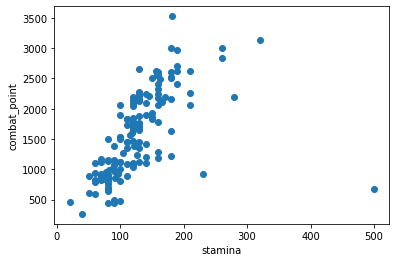

Pearson's correlation coefficient value b/w stamina and  combat_point is (0.582831703222926, 1.1818772953246362e-14)


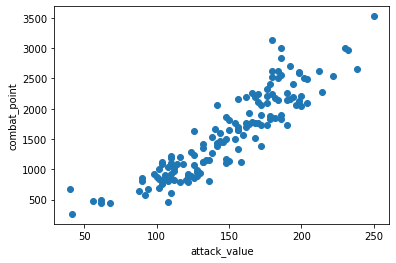

Pearson's correlation coefficient value b/w attack_value and  combat_point is (0.9075315401042733, 4.0645612878520295e-56)


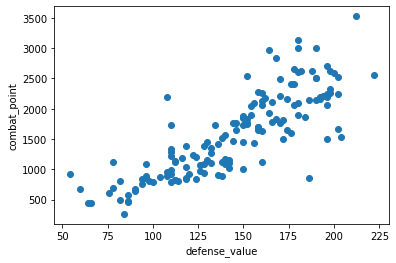

Pearson's correlation coefficient value b/w defense_value and  combat_point is (0.8262293053572931, 1.0323451610469555e-37)


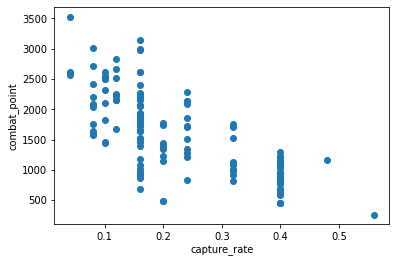

Pearson's correlation coefficient value b/w capture_rate and  combat_point is (-0.7430078083529397, 6.861463966190022e-27)


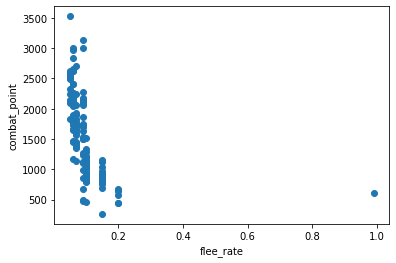

Pearson's correlation coefficient value b/w flee_rate and  combat_point is (-0.4070342114215965, 3.4242291104405343e-07)


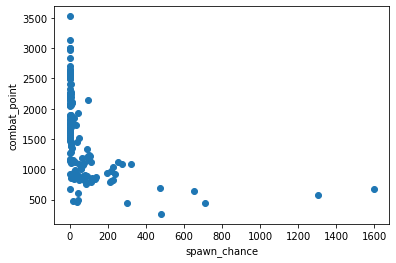

Pearson's correlation coefficient value b/w spawn_chance and  combat_point is (-0.42132699465983586, 1.1849609885289058e-07)


In [81]:
#2.ii



import scipy.stats


for att in num_cols:
  plt.scatter(data[att], data['combat_point'])
  plt.xlabel(att);
  plt.ylabel('combat_point')
  plt.show()
  print('Pearson\'s correlation coefficient value b/w ' + att +  ' and ' + ' combat_point is ' + str(scipy.stats.pearsonr(data[att], data["combat_point"])))




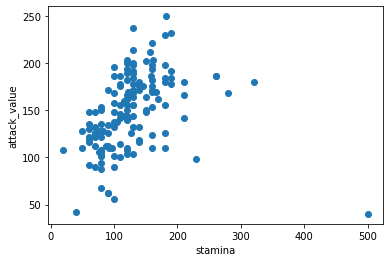

Pearson's correlation coefficient value b/w stamina and attack_value is (0.3029949826738916, 0.00020127731553160256)


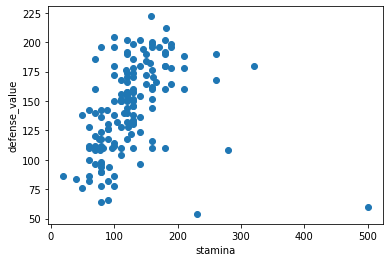

Pearson's correlation coefficient value b/w stamina and defense_value is (0.30266333625368935, 0.00020470610903099498)


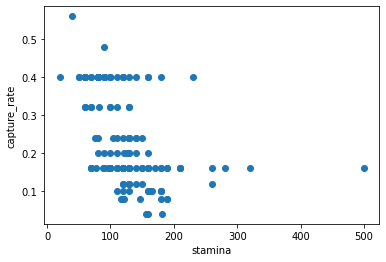

Pearson's correlation coefficient value b/w stamina and capture_rate is (-0.4468503047144601, 1.569666770566093e-08)


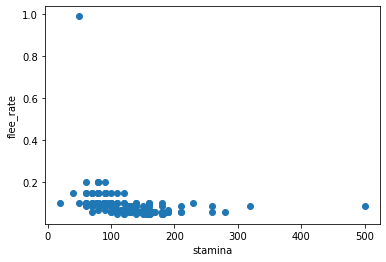

Pearson's correlation coefficient value b/w stamina and flee_rate is (-0.2710475393248393, 0.0009359709354144396)


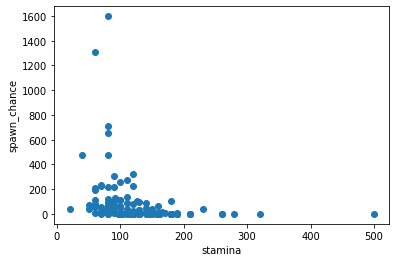

Pearson's correlation coefficient value b/w stamina and spawn_chance is (-0.2764202078836037, 0.0007319031228737242)


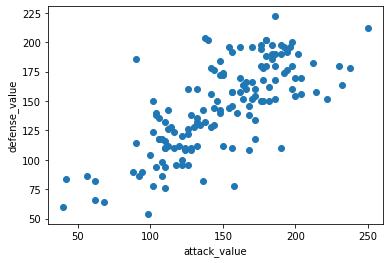

Pearson's correlation coefficient value b/w attack_value and defense_value is (0.7367766467515237, 3.000008007752324e-26)


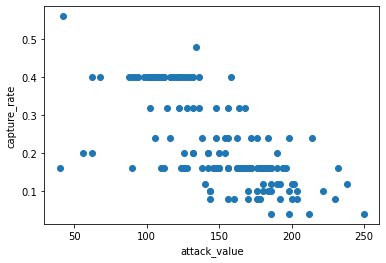

Pearson's correlation coefficient value b/w attack_value and capture_rate is (-0.6905726716022137, 5.226989453763859e-22)


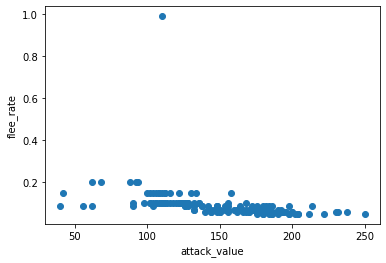

Pearson's correlation coefficient value b/w attack_value and flee_rate is (-0.36906414197600723, 4.562209184192971e-06)


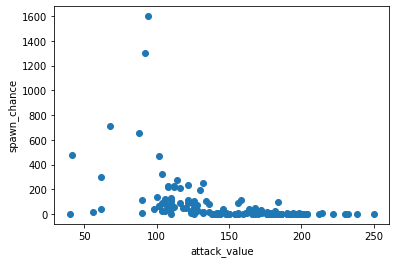

Pearson's correlation coefficient value b/w attack_value and spawn_chance is (-0.4326484402010869, 4.9340197024895764e-08)


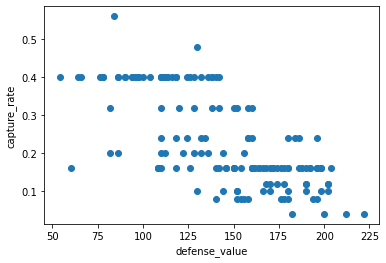

Pearson's correlation coefficient value b/w defense_value and capture_rate is (-0.6972657162131648, 1.4254138012832037e-22)


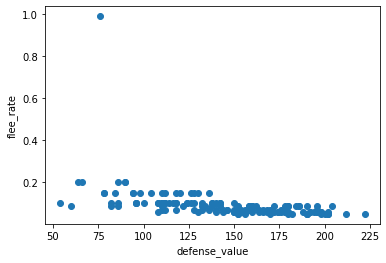

Pearson's correlation coefficient value b/w defense_value and flee_rate is (-0.42385975623729333, 9.76755198374232e-08)


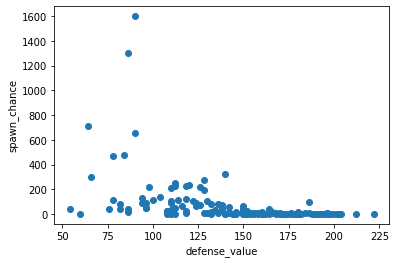

Pearson's correlation coefficient value b/w defense_value and spawn_chance is (-0.43249856208332005, 4.9926323315759966e-08)


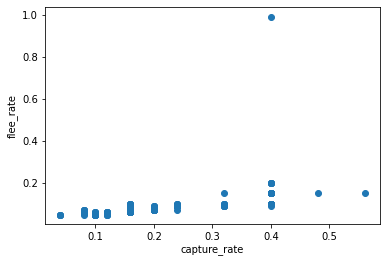

Pearson's correlation coefficient value b/w capture_rate and flee_rate is (0.44051150728059624, 2.6340643503031492e-08)


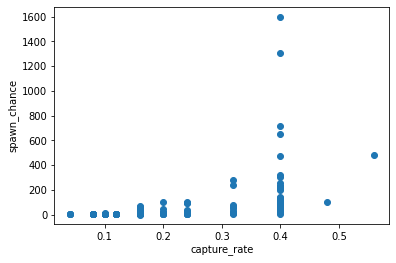

Pearson's correlation coefficient value b/w capture_rate and spawn_chance is (0.4727927266445679, 1.6842408175945235e-09)


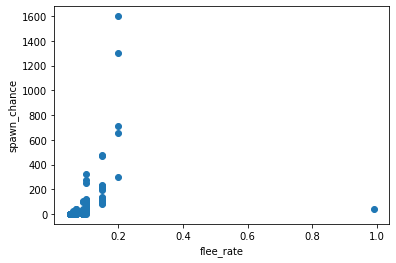

Pearson's correlation coefficient value b/w flee_rate and spawn_chance is (0.29322169222082034, 0.00032835269249229464)


In [82]:
for x in range(len(num_cols)):
  for y in range(x+1,len(num_cols)):
    plt.scatter(data[num_cols[x]], data[num_cols[y]])
    plt.xlabel(num_cols[x])
    plt.ylabel(num_cols[y])
    plt.show()
    print('Pearson\'s correlation coefficient value b/w ' + num_cols[x] +  ' and ' + num_cols[y] + ' is ' + str(scipy.stats.pearsonr(data[num_cols[x]], data[num_cols[y]])))

In [84]:
cat_data = (data[cat_cols[0]])

cols = list(set(list(cat_data['primary_strength'])))

#cols = pd.DataFrame(cols)
print(cols)
for x in range(len(cols)):
  input[cols[x]] = 0.0


for x in range(len(cols)):
  for y in range(len(input[cols[x]])):
    if(input.iloc[y][cat_cols[0]].values[0] == cols[x]):
      input.at[y, cols[x]] = 1.0

print(input.columns)

input.pop('primary_strength')
input.head()

['Ghost', 'Bug', 'Ground', 'Fairy', 'Normal', 'Rock', 'Grass', 'Poison', 'Ice', 'Water', 'Dragon', 'Fire', 'Psychic', 'Fighting', 'Electric']
Index(['stamina', 'attack_value', 'defense_value', 'capture_rate', 'flee_rate',
       'spawn_chance', 'primary_strength', 'Ghost', 'Bug', 'Ground', 'Fairy',
       'Normal', 'Rock', 'Grass', 'Poison', 'Ice', 'Water', 'Dragon', 'Fire',
       'Psychic', 'Fighting', 'Electric'],
      dtype='object')


,stamina,attack_value,defense_value,capture_rate,flee_rate,spawn_chance,Ghost,Bug,Ground,Fairy,Normal,Rock,Grass,Poison,Ice,Water,Dragon,Fire,Psychic,Fighting,Electric
0,90,126,126,0.16,0.10,69.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,120,156,158,0.08,0.07,4.2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,160,198,200,0.04,0.05,1.7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,78,128,108,0.16,0.10,25.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,116,160,140,0.08,0.07,1.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [85]:
from sklearn.utils import shuffle

y_act = data['combat_point']

data = input

data['combat_point'] = y_act

input


,stamina,attack_value,defense_value,capture_rate,flee_rate,spawn_chance,Ghost,Bug,Ground,Fairy,Normal,Rock,Grass,Poison,Ice,Water,Dragon,Fire,Psychic,Fighting,Electric,combat_point
0,90,126,126,0.16,0.10,69.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1079
1,120,156,158,0.08,0.07,4.20,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1643
2,160,198,200,0.04,0.05,1.70,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2598
3,78,128,108,0.16,0.10,25.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,962
4,116,160,140,0.08,0.07,1.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,160,182,162,0.16,0.09,1.80,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2180
142,320,180,180,0.16,0.09,1.60,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3135
143,82,128,110,0.32,0.09,30.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,990
144,122,170,152,0.08,0.06,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1760


In [86]:
data.insert(0,'bias', 1)

In [87]:
import math 



def calculateRss(x_test, w, y_test):
  x_test = x_test.to_numpy()
  y_test = y_test.to_numpy()
  w1 = np.transpose(w)
  x_test = np.transpose(x_test)
  y_pred = np.matmul(w1,x_test);
  #print(y_pred)
  y_test = np.transpose(y_test)
  
  rssError = np.sqrt(np.sum(np.square(y_test-y_pred)))
 # print(rssError)
  return rssError


def linear_algo(x_train,y_train, l):
  x_train = x_train.to_numpy()
  y_train = y_train.to_numpy()
  x_train_transpose = np.transpose(x_train)
  x_val = np.matmul(x_train_transpose, x_train)

  identity_matrix = np.identity(x_val.shape[0],dtype=int)
  identity_matrix = identity_matrix*l
  x_val = np.add(x_val,identity_matrix)
  x_inverse = np.linalg.pinv(x_val)
  x = np.matmul(x_train_transpose, y_train)

  w = np.matmul(x_inverse, x)

  w = np.matmul(x_inverse, x)
  return w


def k_fold(t_data,l,folds=5):
  rss = 0
  for i in range(0,folds):
    t_data = shuffle(t_data)
    s = int(len(t_data)/5)
    test_data = t_data[:s]
    train_data = t_data[s:]
    x_train = train_data.loc[:,:'Normal']
    x_test = test_data.loc[:,:'Normal']
    y_train = train_data.loc[:,'combat_point':]
    y_test = test_data.loc[:,'combat_point':]
    w = linear_algo(x_train,y_train, l)
    rss += calculateRss(x_test, w, y_test)

  print(rss/5)

k_fold(data,0)

1058.0073393066398


In [88]:
#vi
print("For different lamda values:")
for i in range(1,60):
  k_fold(data,math.exp(-i))

For different lamda values:
1273.139370261698
1108.0037563097037
1038.3026341767702
876.299954215214
972.9993365837647
1010.8994552812126
859.8426558992593
1162.1471400503399
706.7134128804838
806.9510531275043
896.1707215063112
890.975386972416
1239.7131497691798
1287.8054456232264
1014.5674294724877
954.0929154159554
1153.6595517592652
697.0376770553657
1044.3607538971162
1188.2769927056204
1098.986622127613
873.3446949745855
618.2364269531163
844.4649300535881
814.7263030712144
887.6945250440074
674.746548133289
977.9327318871617
636.5626249704871
1039.728285357271
599.3477057536468
811.1202128587373
627.3597704879097
661.0518145518965
859.3098930572767
752.6420078990545
1171.5776334258671
824.1761586482402
1086.498288166837
1008.6945205737295
1387.2428784483689
1026.6819035117956
750.813978390592
663.3156294064127
876.7444131856242
601.5066197053138
1090.156197962059
1223.627879260564
1007.9714778401245
990.6973559231207
1010.2581569308353
776.2317768410427
568.6851672094057
672.78

In [89]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

mean = np.mean(data['combat_point'])

y_val = list(data['combat_point'])

y_data = []
for i in y_val:
  if(i < int(mean)):
    y_data.append(0)
  else:
    y_data.append(1)

y_data = pd.DataFrame(y_data)

x_train, x_test, y_train, y_test = train_test_split(data.loc[:,:'Normal'],y_data, test_size = (0.2))
clf = LogisticRegression(random_state=0,penalty='none').fit(x_train,y_train)

print(clf.score(x_test,y_test))


0.9666666666666667
